# 1. Data Preprocessing

## 1.1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read training and testing csv file
# Let's see what's inside🧐

train = pd.read_csv(".//Dataset//train.csv")
test = pd.read_csv(".//Dataset//test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print('Train Shape : {}'.format(train.shape))

print('Test Shape : {}'.format(test.shape))

Train Shape : (1460, 81)
Test Shape : (1459, 80)


In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
#Drop Id Columns
train.drop(columns = 'Id', axis = 1, inplace = True)
test.drop(columns = 'Id', axis = 1, inplace = True)

## 1.2 Examine Missing Values

In [8]:
class Missing:
    
    def __init__(self, obj):
        
        self.obj = obj
        
        if self.obj == 'missing_num':
            
            self.num_features_missing = []
        
            self.num_features_missing_val = []
        
        else:
            
            self.cat_features_missing = []
        
            self.cat_features_missing_val = []
      
    def missing_features(self):
        
        """Function to visualize features with missing values along with their count"""
        
        for col in train.columns:
            
            if self.obj == 'missing_num':
            
                if train[col].dtype != 'object':
                
                    feature_missing_count = train[col].isna().sum()
            
                    if feature_missing_count != 0:
                
                        self.num_features_missing.append(col)
                
                        self.num_features_missing_val.append(feature_missing_count)
               
            else:
                
                if train[col].dtype == 'object':
                
                    feature_missing_count = train[col].isna().sum()
            
                    if feature_missing_count != 0:
                
                        self.cat_features_missing.append(col)
                
                        self.cat_features_missing_val.append(feature_missing_count)  
            

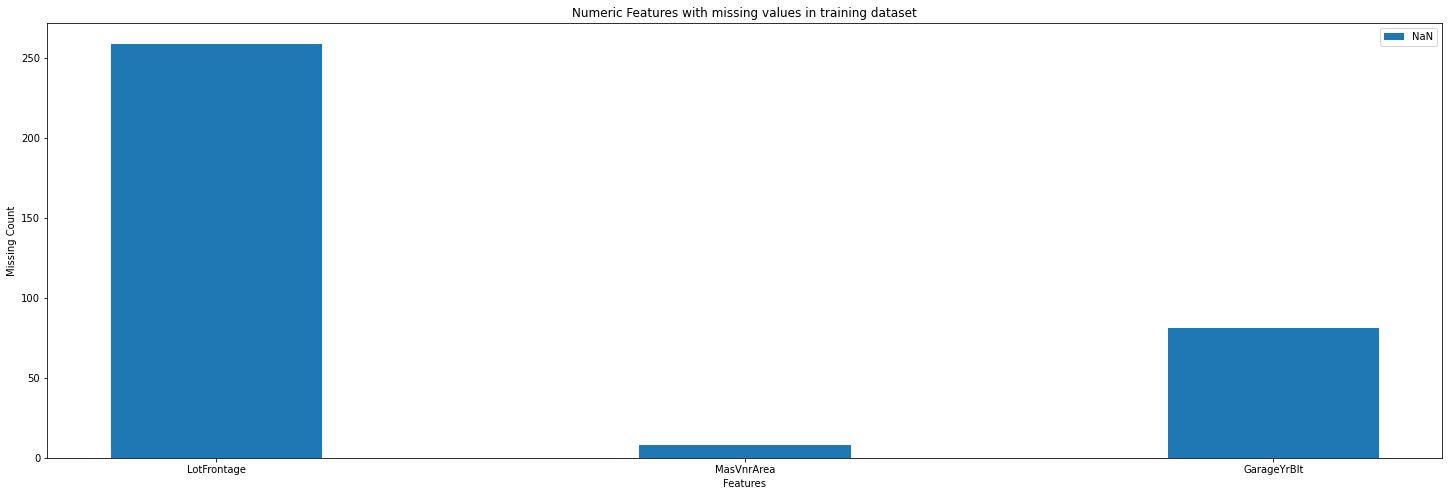

In [9]:
# Numerical features with missing values
missing_num = Missing('missing_num')

missing_num.missing_features()

fig = plt.figure(figsize=(25,8))
            
plt.bar(missing_num.num_features_missing, missing_num.num_features_missing_val, width = 0.4)
    
plt.title('Numeric Features with missing values in training dataset')
    
plt.xlabel('Features')
    
plt.ylabel('Missing Count')
    
plt.legend(['NaN'], loc="upper right")

In [10]:
# Checking the target Column
train['SalePrice'].isna().sum()

0

Text(0.5, 1.0, 'Distribution of Sales Price')

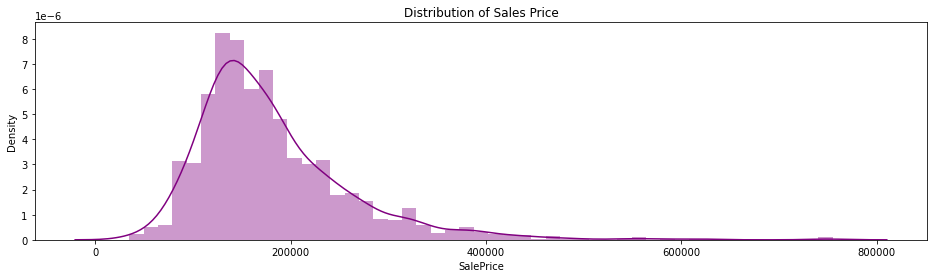

In [11]:
#Checking Distribution of SalePrice Values

plt.figure(figsize=(16,4))

sns.distplot(train['SalePrice'], color="purple")

plt.title('Distribution of Sales Price')

Numerical Data Imputation

How should Jerry find out the missing values?

Jerry will use the imputation technique to replace the missing values in the dataset with another values i.e. either mean, mode or median or some other operation.

In [12]:
print("Numeric Features with missing values : ")
for col in train.columns:
    
    if train[col].isna().sum() != 0 and train[col].dtypes in ['int64','float64']:
        
        print(col)

Numeric Features with missing values : 
LotFrontage
MasVnrArea
GarageYrBlt


Plotting the distribution of these variables

Text(0.5, 1.0, 'Distribution of LotFrontage')

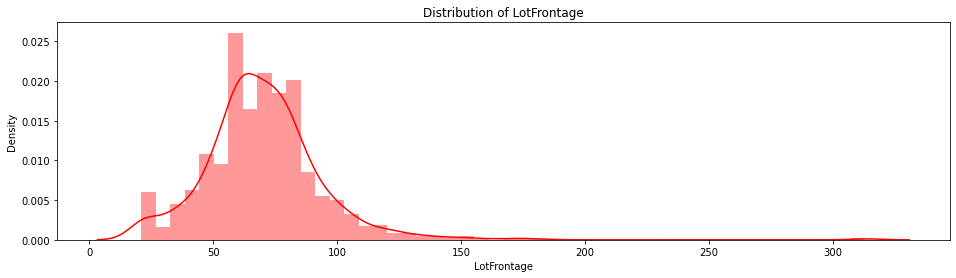

In [13]:
plt.figure(figsize=(16,4))

sns.distplot(train['LotFrontage'], color="red")

#sns.boxplot(train['LotFrontage'], color="red")

plt.title('Distribution of LotFrontage')

For the above feature, since the distribution is asymetric jerry will use the median imputation, as mean is biased towards the values at the far end of the distribution.

Text(0.5, 1.0, 'Distribution of MasVnrArea')

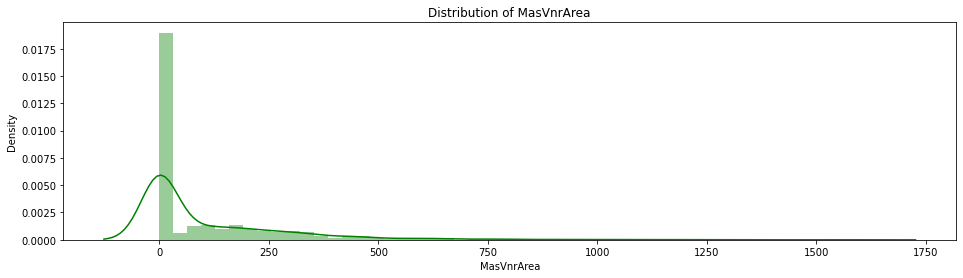

In [14]:
plt.figure(figsize=(16,4))

sns.distplot(train['MasVnrArea'], color="green")

plt.title('Distribution of MasVnrArea')

For the above feature, since the distribution is strongly asymetric to the right Jerry will use the mode imputation technique. 

Text(0.5, 1.0, 'Distribution of GarageYrBlt')

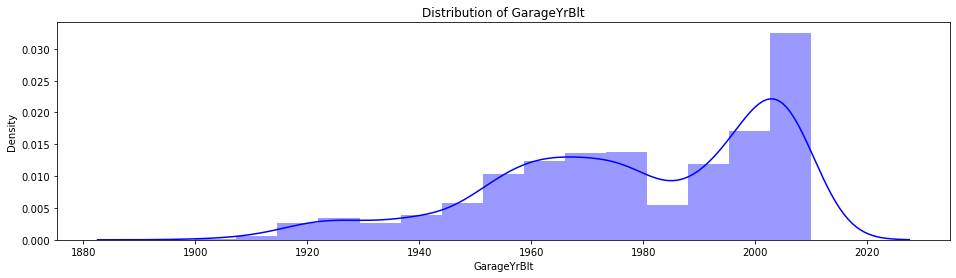

In [15]:
plt.figure(figsize=(16,4))

sns.distplot(train['GarageYrBlt'], color="blue")

#sns.boxplot(train['GarageYrBlt'], color="blue")

plt.title('Distribution of GarageYrBlt')

For the above feature, since the distribution is asymetric again Jerry will use the median imputation.

In [16]:
"""
Jerry can see some columns have too many missing values. He will drop such features which have more than 50% data missing.
For eg. - Alley, PoolQC, Fence, MiscFeature
"""
print("Dropped features are : ")
for col in train.columns:
    
    if train[col].isna().sum() > (train.shape[0] * 0.5):
        
        print(col)
        
        train.drop(col, axis = 1, inplace = True)
        
        test.drop(col, axis = 1, inplace = True)

Dropped features are : 
Alley
PoolQC
Fence
MiscFeature


For the categorical features with missing values Jerry will use mode as our imputation technique

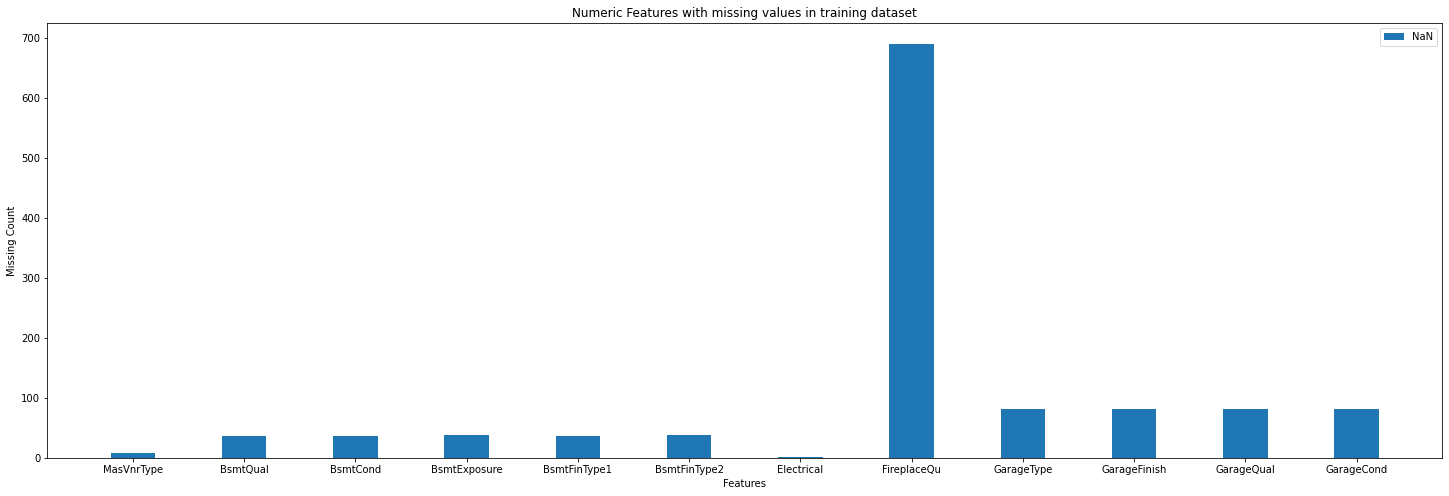

In [17]:
# Categorical features with missing values
missing_cat = Missing('missing_cat')

missing_cat.missing_features()

fig = plt.figure(figsize=(25,8))
            
plt.bar(missing_cat.cat_features_missing, missing_cat.cat_features_missing_val, width = 0.4)
    
plt.title('Numeric Features with missing values in training dataset')
    
plt.xlabel('Features')
    
plt.ylabel('Missing Count')
    
plt.legend(['NaN'], loc="upper right")

In [18]:
# Finding missing numeric features values

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace = True)

train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mode(), inplace = True)

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace = True)

test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median(), inplace = True)

test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mode(), inplace = True)

test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(), inplace = True)

Jerry has to impute categorical data and encode(converting the object datatype to int datatype) it.
For this jerry has different options available🙌
* Label Encoding/ Ordinal Encoding
* One-Hot encoding
* Dummy Encoding
* Effect Encoding

In [19]:
categ_cols = []

for col in train.columns:
    
    if train[col].dtype == "object":
        
        categ_cols.append(col)
        
train[categ_cols].head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,None,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,NaN,Attchd,None,RFn,TA,TA,Y,WD,Normal
1,RL,None,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,TA,Attchd,None,RFn,TA,TA,Y,WD,Normal
2,RL,None,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,TA,Attchd,None,RFn,TA,TA,Y,WD,Normal
3,RL,None,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Gd,Detchd,None,Unf,TA,TA,Y,WD,Abnorml
4,RL,None,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,TA,Attchd,None,RFn,TA,TA,Y,WD,Normal


In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

In [21]:
encoder = OneHotEncoder(handle_unknown='ignore')

imputer = SimpleImputer(strategy = "most_frequent")

In [22]:
# Perform Imputation
for col in categ_cols:
    
    train[col] = imputer.fit_transform(X = train[[col]])
    
    
    test[col] =  imputer.fit_transform(X = test[[col]])
    
# OneHotEncoding
encoded_train_df = pd.DataFrame(encoder.fit_transform(train[categ_cols]).toarray())

encoded_test_df = pd.DataFrame(encoder.fit_transform(test[categ_cols]).toarray())

# Dropping previous categorical cols
train.drop(columns = categ_cols, axis = 1, inplace = True)

test.drop(columns = categ_cols, axis = 1, inplace = True)

# Concatinating encoded categorical cols

train = pd.concat([train, encoded_train_df], axis = 1)

test = pd.concat([test, encoded_test_df], axis = 1)

In [23]:
train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,232,233,234,235,236,237,238,239,240,241
0,60,8450,7,5,2003,2003,706,0,150,856,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,216,217,218,219,220,221,222,223,224,225
0,20,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60,9978,6,6,1998,1998,602.0,0.0,324.0,926.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120,5005,8,5,1992,1992,263.0,0.0,1017.0,1280.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
print('Train Shape : {}'.format(train.shape))

print('Test Shape : {}'.format(test.shape))

Train Shape : (1460, 276)
Test Shape : (1459, 259)


In [26]:
# Just a check
for col in train.columns:
    
    if train[col].isna().sum() != 0:
        
        print(col,train[col].dtype, train[col].isna().sum(), sep="-->")

Nothing output of above cell✌️, Jerry has done great work

## 2. Model Development

This section includes below steps:
1. Data preparation in order to feed the model
2. Develop different models and compare them.

In [27]:
# !pip install xgboost

In [28]:
# Hyperparameter Optimization

xgb_parms = {
                "max_depth"          :    [3, 4, 5, 6, 8, 10, 12, 15],
                "learning_rate"      :    [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
                "min_child_weight"   :    [1, 3, 5, 7],
                "gamma"              :    [0.0, 0.1, 0.2, 0.3,0.4],
                "colsample_bytree"   :    [0.3, 0.4, 0.5, 0.6]
            }


rf_parms = {
                "n_estimators"      :     np.arange(100, 1500, 100),
                "max_depth"         :     np.arange(1,20),
                "max_features"      :     ['auto', 'sqrt', 'log2']
           }

In [29]:
import time

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error

In [30]:
X = train.drop(['SalePrice'], axis = 1)

Y = train[['SalePrice']]

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [31]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~
# Linear Regression sklearn
# ~~~~~~~~~~~~~~~~~~~~~~~~~

model_1 = LinearRegression()

model_1.fit(X_train, Y_train)

model_1_pred = model_1.predict(X_val)

mean_abs_error_m1 = mean_absolute_error(model_1_pred, Y_val)

print("Mean Absolute Error of Model 1 : ", mean_abs_error_m1)

Mean Absolute Error of Model 1 :  21285.58548435776


Linear Regression model seems to be underfitted

In [32]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~
# Decision Tree sklearn
# ~~~~~~~~~~~~~~~~~~~~~~~~~

model_2 = DecisionTreeRegressor()

model_2.fit(X_train, Y_train)

model_2_pred = model_2.predict(X_val)

mean_abs_error_m2 = mean_absolute_error(model_2_pred, Y_val)

print("Mean Absolute Error of Model 2 : ", mean_abs_error_m2)

Mean Absolute Error of Model 2 :  26101.189497716896


In [33]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~
# Random Forest sklearn
# ~~~~~~~~~~~~~~~~~~~~~~~~~

model_3 = RandomForestRegressor()

model_3.fit(X_train, Y_train.values.ravel())

model_3_pred = model_3.predict(X_val)

mean_abs_error_m3 = mean_absolute_error(model_3_pred, Y_val)

print("Mean Absolute Error of Model 3 : ", mean_abs_error_m3)

Mean Absolute Error of Model 3 :  17153.490456621006


In [34]:
# random_search_rf = RandomizedSearchCV(model_3, param_distributions = rf_parms, n_iter = 5, scoring = 'roc_auc', n_jobs=-1, 
#                                   cv = 5, verbose = 3)

In [35]:
# start_time = time.time()

# random_search_rf.fit(X_train, Y_train.values.ravel())

# end_time = time.time()

# print("Time taken : {0}".format(end_time - start_time))

In [36]:
# random_search_rf.best_estimator_

In [37]:
# model_4 = RandomForestRegressor(max_depth=13, max_features='sqrt', n_estimators=600)

In [38]:
# model_4.fit(X_train, Y_train.values.ravel())

# model_4_pred = model_4.predict(X_val)

# mean_abs_error_m4 = mean_absolute_error(model_4_pred, Y_val)

# print("Mean Absolute Error of Model 4 : ", mean_abs_error_m4)

In [39]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~
# XGB Regressor sklearn
# ~~~~~~~~~~~~~~~~~~~~~~~~~

model_5 = XGBRegressor()

model_5.fit(X_train, Y_train)

model_5_pred = model_5.predict(X_val)

mean_abs_error_m5 = mean_absolute_error(model_5_pred, Y_val)

print("Mean Absolute Error of Model 5 : ", mean_abs_error_m5)

Mean Absolute Error of Model 5 :  17127.3192512129


In [40]:
random_search = RandomizedSearchCV(model_5, param_distributions = xgb_parms, n_iter = 5, scoring = 'roc_auc', n_jobs=-1, 
                                   cv = 5, verbose = 3)

In [41]:
start_time = time.time()

random_search.fit(X_train, Y_train)

end_time = time.time()

print("Time taken : {0}".format(end_time - start_time))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\mudga\anaconda3\envs\abhay_venv\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


Time taken : 24.18411946296692


In [42]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [43]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.3}

In [44]:
model_6 = XGBRegressor(**random_search.best_params_)

In [45]:
model_6.fit(X_train, Y_train)

model_6_pred = model_6.predict(X_val)

mean_abs_error_m6 = mean_absolute_error(model_6_pred, Y_val)

print("Mean Absolute Error of Model 6 : ", mean_abs_error_m6)

Mean Absolute Error of Model 6 :  15600.624928652967


Minimum Mean Absolute Error - 15600.624928652967(XGB with hyperparameter optimization)